This notebook aims to explain the data preparation we are performing.

We will try to creat a classe object to have access to our data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import cv2

import numpy as np

from PIL import Image

In [147]:

test_image = np.array(Image.open('Database/Deezer/Deezer_19.png'))[:,:,3]
test_image = cv2.resize(test_image, (64, 64))

In [148]:
test_image.shape

(64, 64)

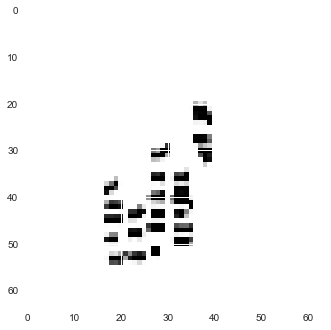

In [149]:
plt.imshow(test_image)

In [150]:
%%time
from glob import glob
import os

imPath = "Database/All_pictures/"
ls_path = glob(os.path.join(imPath, '*' ))



Wall time: 29 ms


In [152]:
ls_path[0].split('\\')[1].split('_')[0]

'Deezer'

In [153]:
%%time
name_to_label ={'Deezer':[1,0,0,0],'Messenger':[0,1,0,0],'Facebook':[0,0,1,0],'Tinder':[0,0,0,1]} #Pour labeliser facilement

data_base={'data': [], 'label' : [],'nom_label' :[],'image':[]}
for file in ls_path:                        #On parcours tous les fichiers                
    im = np.array(Image.open('Database/Deezer/Deezer_19.png'))[:,:,3]   #On charge l'image
  
    im = cv2.resize(im, (64, 64))             #On met au bon format de pixels
    name= file.split('\\')[1].split('_')[0] #On extrait le type
    
    data_aug = 1                             # Si on veut faire de la data_aug
    for i in range(data_aug):
        num_rows, num_cols = im.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), i*90, 1)
        im_rotation = cv2.warpAffine(im, rotation_matrix, (num_cols, num_rows))
        
        data_base['data']+=[np.ndarray.flatten(im_rotation)]
        data_base['label']+=[name_to_label[name]]
        data_base['nom_label']+=[name]
        data_base['image']+=[im_rotation]
data_base['data']=np.array(data_base['data'])
data_base['label']=np.array(data_base['label'])
data_base['nom_label']=np.array(data_base['nom_label'])
data_base['image']=np.array(data_base['image'])

Wall time: 1.97 s


In [154]:
data_base

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'image': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0